![image-Snipaste_2024-01-14_16-14-24.png](./assets/Snipaste_2024-01-14_16-14-24.png)
![image-Snipaste_2024-01-14_16-15-47.png](./assets/Snipaste_2024-01-14_16-15-47.png)
![image-Snipaste_2024-01-14_16-16-46.png](./assets/Snipaste_2024-01-14_16-16-46.png)
![image-Snipaste_2024-01-14_16-18-59.png](./assets/Snipaste_2024-01-14_16-18-59.png)
![image-Snipaste_2024-01-14_16-20-04.png](./assets/Snipaste_2024-01-14_16-20-04.png)
![image-Snipaste_2024-01-14_16-21-21.png](./assets/Snipaste_2024-01-14_16-21-21.png)
![image-Snipaste_2024-01-14_16-22-39.png](./assets/Snipaste_2024-01-14_16-22-39.png)
![image-Snipaste_2024-01-14_16-24-03.png](./assets/Snipaste_2024-01-14_16-24-03.png)

## 基础优化方法
![image-Snipaste_2024-01-14_16-25-13.png](./assets/Snipaste_2024-01-14_16-25-13.png)
![image-Snipaste_2024-01-14_16-29-27.png](./assets/Snipaste_2024-01-14_16-29-27.png)
![image_Snipaste_2024-01-14_16-31-01.png](./assets/Snipaste_2024-01-14_16-31-01.png)
![image-Snipaste_2024-01-14_16-32-53.png](./assets/Snipaste_2024-01-14_16-32-53.png)

## 线性回归的从零开始实现
我们将从零开始实现整个方法，包括数据流水线，模型，损失函数和小批量随机梯度下降优化器

**损失函数**是度量预测值与真实之间距离的一种函数，当我们度量到真实值与预测值之间的误差，我们需要选定一种方法根据误差来更新模型参数（w，b）最大程度来减少预测误差


In [15]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


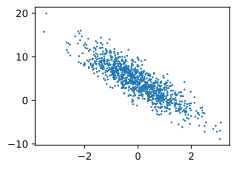

In [16]:
# 根据带有噪音的线性模型构建一个人造数据集，
#我们使用线性模型参数w=[2,-3.4]^T b=4.2 和噪音项c 生成数据集及其标签

def synthetic_data(w, b, num_examples):
    """生成y=Xw+b+噪音。"""
    # 均值方程
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [23]:
# 定义一个data_iter函数，该函数接收批量大小，特征矩阵和标签向量作为输入，生成大小为batch_size的小批量

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        # print(batch_indices)
        yield features[batch_indices], labels[batch_indices]


batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, "\n", y)
    break

# 定义初始化模型参数
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)

b = torch.zeros(1, requires_grad=True)


# 定义模型
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b


# 定义损失函数 loss
def squared_loss(y_hat, y):
    """均方误差"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


# 定义优化算法 
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  #`x`和`y`的小批量损失
        # 因为`l`的形状是`(batch_size,1)`而不是一个标量。`l`中的所有元素被加到一起
        # 并以此计算关于`[w,b]`的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_1 = loss(net(features, w, b), labels)
        print(f"epoch:{epoch + 1},loss:{float(train_1.mean()):f}")
        print(f"w的估计误差:{true_w - w.reshape(true_w.shape)}")
        print(f"b的估计误差:{true_b - b}")

tensor([[ 1.2500,  1.3090],
        [ 1.1490, -0.5451],
        [ 0.7693, -2.0294],
        [ 0.2937, -1.2719],
        [ 3.1034, -0.3622],
        [ 0.1710,  0.5130],
        [-2.3583, -1.0385],
        [ 2.0013,  1.2128],
        [-1.1262,  1.1793],
        [-1.9892, -0.2712]]) 
 tensor([[ 2.2365],
        [ 8.3491],
        [12.6233],
        [ 9.1010],
        [11.6282],
        [ 2.8082],
        [ 3.0157],
        [ 4.0825],
        [-2.0717],
        [ 1.1508]])
epoch:1,loss:0.027258
w的估计误差:tensor([ 0.0548, -0.1262])
b的估计误差:tensor([0.1812])
epoch:2,loss:0.000097
w的估计误差:tensor([ 0.0015, -0.0044])
b的估计误差:tensor([0.0080])
epoch:3,loss:0.000052
w的估计误差:tensor([ 0.0003, -0.0002])
b的估计误差:tensor([-7.1526e-05])


In [37]:
# 线性回归的就案件实现
# 通过使用深度学习框架来简介地实现线性回归模型生成数据集

import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
ture_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1500)


def load_array(data_arrays, batch_size, is_train=True):
    """构建一个Pytorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)


batch_size = 10
data_iter = load_array((features, labels), batch_size)
# next(iter(data_iter))
# 使用框架的预定义好的层
# `nn`是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))
# 初始化模型参数(初始化权重和偏差)
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
# 计算均方误差使用的是MSELoss类 ,也称为平方l2范数
loss = nn.MSELoss()
# 实例化SGD实例
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

# 训练
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f"epoch:{epoch + 1},loss:{l:f}")

epoch:1,loss:0.000103
epoch:2,loss:0.000102
epoch:3,loss:0.000102
